In [1]:
import numpy as np
import pandas as pd
# Consider the following Python dictionary data and Python list labels:

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [2]:
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [4]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [5]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [6]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [7]:
df[df['visits'] >= 3]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [8]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [9]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [10]:
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [11]:
df.at['f', 'age'] = 1.5

In [12]:
df['visits'].sum()

19

In [13]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [14]:
df.loc['k'] = ['dog', 5.5, 2, 'no']
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [15]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [16]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [17]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


Part II - Data Visualization

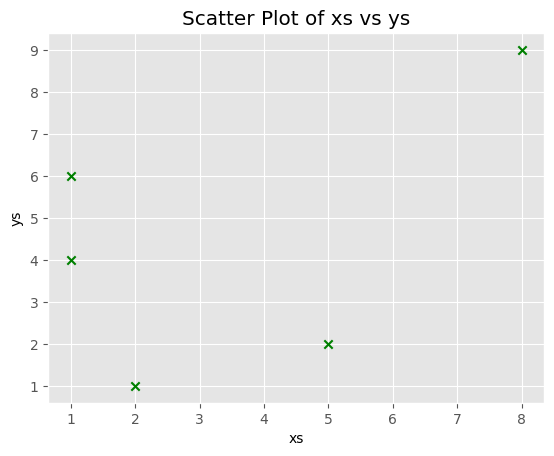

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

plt.style.use('ggplot')

df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})

plt.scatter(df['xs'], df['ys'], color='green', marker='x')

plt.title('Scatter Plot of xs vs ys')
plt.xlabel('xs')
plt.ylabel('ys')

plt.show()

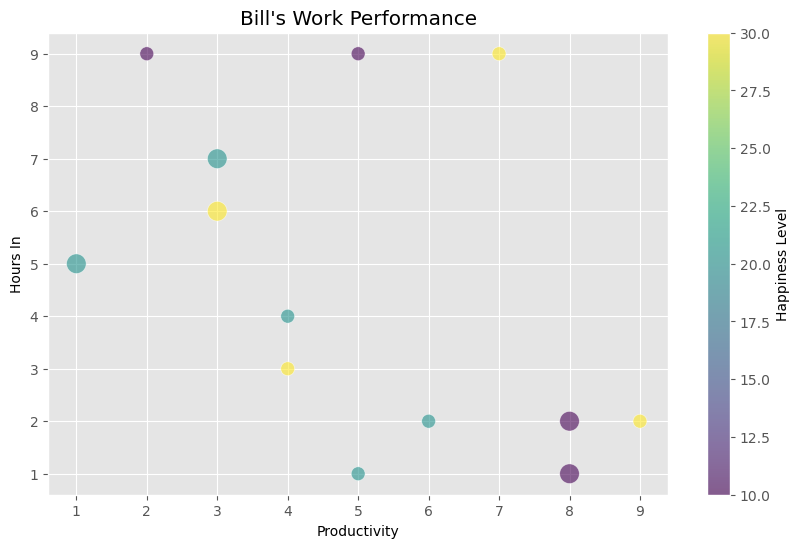

In [19]:
# Create the DataFrame
df = pd.DataFrame({"productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
                   "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
                   "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
                   "caffienated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]})

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['productivity'], df['hours_in'],
                      c=df['happiness']*10,  # Multiply by 10 for better color differentiation
                      s=(df['caffienated']+1)*100,  # Add 1 to ensure non-caffienated days are visible, then multiply for size
                      cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Adding color bar
plt.colorbar(scatter, label='Happiness Level')

# Adding title and labels
plt.title('Bill\'s Work Performance')
plt.xlabel('Productivity')
plt.ylabel('Hours In')

plt.show()

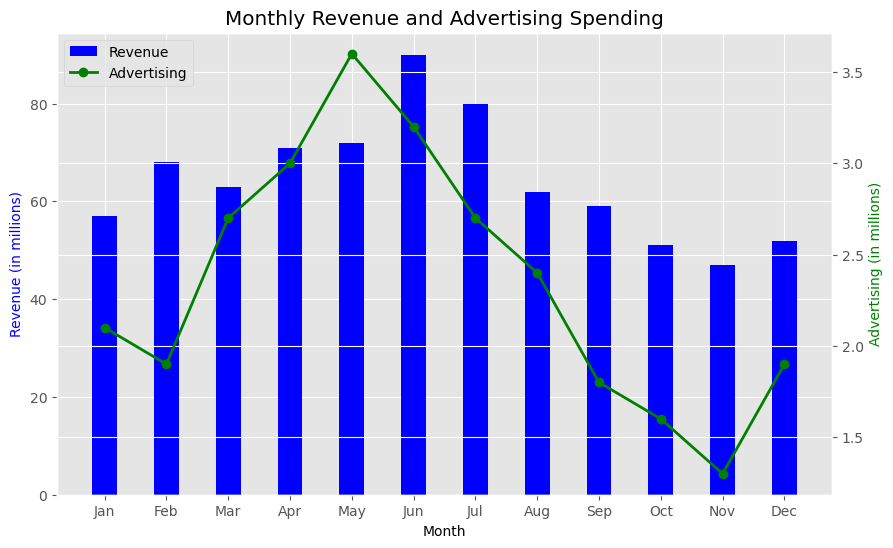

In [20]:
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month": range(1, 13)  # Assuming months are 1 through 12 for clarity
})

# Set the style
plt.style.use('ggplot')

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for revenue
revenue_plot = ax1.bar(df['month'], df['revenue'], color='b', label='Revenue', width=0.4, align='center')

# Create a second y-axis for the advertising plot
ax2 = ax1.twinx()

# Line plot for advertising
advertising_plot = ax2.plot(df['month'], df['advertising'], color='g', label='Advertising', marker='o', linewidth=2)

# Labels, title, and legend
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (in millions)', color='b')
ax2.set_ylabel('Advertising (in millions)', color='g')
ax1.set_title('Monthly Revenue and Advertising Spending')

# Setting the month labels on the x-axis to be more descriptive
ax1.set_xticks(df['month'])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()